In [1]:
using Symbolics
using LinearAlgebra
using Latexify
using Plots
#import Pkg; Pkg.add("BenchmarkTools")
using BenchmarkTools

In [8]:
include("symbolics_ext.jl")

χaAB (generic function with 1 method)

In [4]:
D = Int64(3) #dimensions
L = (D+(D*(D+1)÷2))
println("D = $D, L = $L")
g = make_g(D)
ζ = rand(L)
p = ([1.0;1.0;1.0]);

D = 3, L = 9


In [5]:
@variables vs[1:L] ps[1:3]
vst = [vs[i] for i ∈ 1:L]
vs_a = [vs[i] for i ∈ 1:D]
ΦaA = χaA(Φ_new(vs,ps),vs_a,vst);
ΦaA_exp = Symbolics.build_function(ΦaA,vs,ps);
ΦaA_f = eval(ΦaA_exp[1])

#10 (generic function with 1 method)

In [6]:
@btime ΦaA_f($rand(L),p)

  2.125 μs (29 allocations: 832 bytes)


3×9 Matrix{Float64}:
  1.50382e9  -8.42488e8  -1.27022e9  …  -4.6069e7   -9.50681e7  -1.80498e8
 -8.42488e8   4.40965e8   7.29485e8      1.89839e7   4.23589e7   8.59019e7
 -1.27022e9   7.29485e8   1.06295e9      4.23567e7   8.59028e7   1.60224e8

In [9]:
ΦaAB = Symbolics.simplify(χaAB(Φ_new(vs,ps),vst));
ΦaAB_exp = Symbolics.build_function(ΦaAB,vs,ps);
ΦaAB_f = eval(ΦaAB_exp[1])

#15 (generic function with 1 method)

In [10]:
ζ_t = zeros(L)
ζ_t[1] = 1.0  
ζ_t[2] = 0.10
#ζ_t[D + l_ind(1,1,D)] = 0.1 #00
#ζ_t[D + l_ind(1,2,D)] = 0.25 #01
#ζ_t[D + l_ind(2,2,D)] = 0.5 #11

println(ζ_t)
println(make_vector_TF!(ζ_t))
tr(g*vector_unpack(ζ_t)[2])

[1.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


0.0

In [21]:
@btime ΦaAB_f(rand(L),p)[1:(L-1),1:(L-1),2]

  4.846 ms (1221 allocations: 527.75 KiB)


8×8 Matrix{Float64}:
 -1.21519e8   9.14051e7   8.3065e7   …      -2.76023e6      -2.75156e6
  9.14051e7  -6.71289e7  -6.43782e7          1.92178e6       2.05961e6
  8.3065e7   -6.43782e7  -5.47905e7          2.0568e6        1.91173e6
 -5.15443e6   3.83066e6   3.58341e6     -65235.2        -68058.8
  3.8278e6   -2.76375e6  -2.75156e6      43988.7         50022.0
  3.58059e6  -2.75156e6  -2.39771e6  …   50022.0         48431.1
 -2.76023e6   1.92178e6   2.0568e6      -27916.4        -35176.9
 -2.75156e6   2.05961e6   1.91173e6     -35176.9        -37318.8

In [12]:
N = 1000
T = 1
ζ = ζ_t #[-1.0;0.0;0.001;0.001;0.01];
make_vector_TF!(ζ)
par_f = [-1.0,1.0,-1.0]
#par_f = [-1,-0.5,-20]
E = fill(0.0+0.0im,(L-1,N))
v = zeros(N)
for i in 1:N
    v[i] = (i-1)/(N-1)/1.01
    γ = 1.0 / sqrt(1.0 - v[i]^2)
    ζ[1] = γ / T
    ζ[2] = v[i] * γ / T
    #E[:,i]=eigvals(ΦaAB_f(ζ,par_f)[1:D,1:D,2], ΦaAB_f(ζ,par_f)[1:D,1:D,1])
    E[:,i]=eigvals(ΦaAB_f(ζ,par_f)[1:(L-1),1:(L-1),2], ΦaAB_f(ζ,par_f)[1:(L-1),1:(L-1),1])
    #E[:,i]=eigvals(inv(ΦaAB_f(ζ,par_f)[1:(L-1),1:(L-1),1])*ΦaAB_f(ζ,par_f)[1:(L-1),1:(L-1),2])
    #E[:,i]=eigvals(ΦaAB_f(ζ,par_f)[1:D,1:D,1])
    #E[:,i]=eigvals(ΦaAB_f(ζ,par_f)[1:(L-1),1:(L-1),1])
end

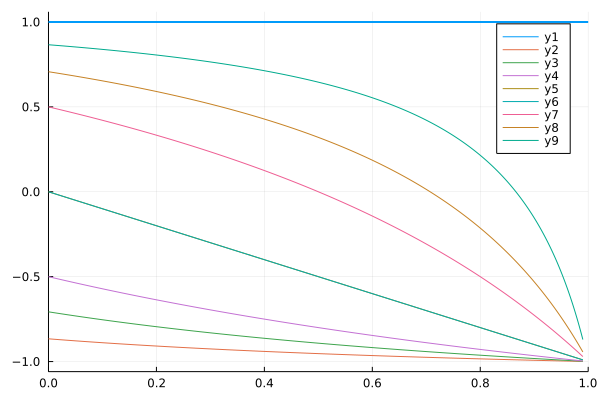

In [13]:
one(x)=1
plt = plot(one,xlim=(0,1),legend=:topright, lw=2
#,legend=:bottomright
#, ylim = (-1,2)
)
for k in 1:(L-1)
    plot!(plt, v,real(E[k,:]))
end

plt

the eigenvalues are (v=0, p = [-1,1,-1]):

$\{\pm \sqrt{3/4},\; \pm 1/2,\; \pm 1/4,\; 0(2) \}$

In [22]:
T = ΦaA_f(ζ_t,[-1.0,1.0,-1.0])[1:D,1:D]
tr(g*T)

0.0

In [23]:
AA = get_A(ΦaA_f(make_vector_TF!(rand(L)),[-1.0,1.0,1.0]))
println("symmetries? ", full_symmetry_check(AA))
println("tr_A_12 = $(tr_A_12(AA,g))")
println("tr_A_13 = $(tr_A_13(AA,g))")

symmetries? 5.506706202140776e-13
tr_A_12 = [7.105427357601002e-15, -2.1316282072803006e-14, 0.0]
tr_A_13 = [-9.237055564881302e-14, 2.1316282072803006e-14, 5.684341886080802e-14]
